In [40]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mvn
from scipy.stats import logistic

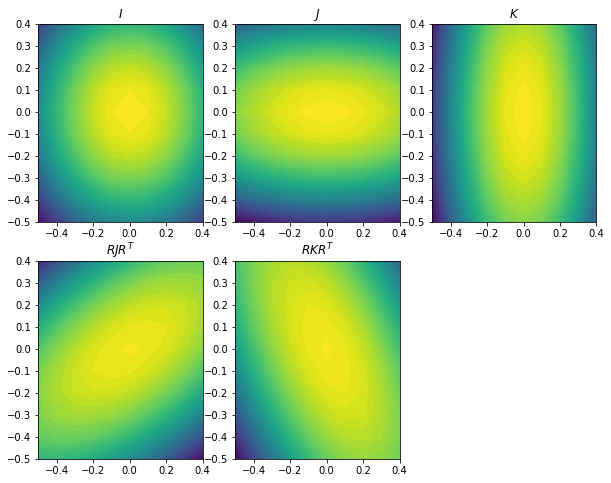

In [41]:
delta = .1

# Create figure object.
fig = plt.figure(figsize=[10, 8])

mean = (0, 0)
I = np.array([[1, 0], [0, 1]])
J = np.array([[5, 0], [0, 1]])
K = np.array([[1, 0], [0, 5]])
R = np.array([[np.sqrt(3)/2, -1/2], [1/2, np.sqrt(3)/2]])

biv_norm1 = mvn(cov=I, mean=mean)
biv_norm2 = mvn(cov=J, mean=mean)
biv_norm3 = mvn(cov=K, mean=mean)
biv_norm4 = mvn(cov=R@J@R.T, mean=mean)
biv_norm5 = mvn(cov=R@K@R.T, mean=mean)

#Contour Plot
ax1 = fig.add_subplot(231)
x = np.arange(-0.5, 0.5, delta)
y = np.arange(-0.5, 0.5, delta)
X, Y = np.meshgrid(x, y)
pts = np.dstack([X, Y])
Z1 = biv_norm1.pdf(pts)

ax1.contourf(X, Y, Z1, 50)
ax1.set_title(r'$I$')

ax2 = fig.add_subplot(232)
Z2 = biv_norm2.pdf(pts)
ax2.contourf(X, Y, Z2, 50)
ax2.set_title(r'$J$')

ax3 = fig.add_subplot(233)
Z3 = biv_norm3.pdf(pts)
ax3.contourf(X, Y, Z3, 50)
ax3.set_title(r'$K$')

ax4 = fig.add_subplot(234)
Z4 = biv_norm4.pdf(pts)
ax4.contourf(X, Y, Z4, 50)
ax4.set_title(r'$RJR^T$')

ax5 = fig.add_subplot(235)
Z5 = biv_norm5.pdf(pts)
ax5.contourf(X, Y, Z5, 50)
ax5.set_title(r'$RKR^T$')

fig.savefig("BivariateNormal.pdf", bbox_inches='tight')



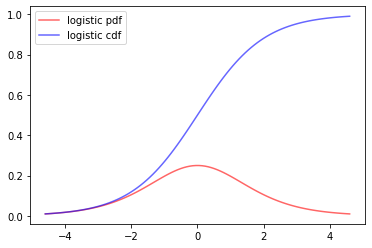

In [39]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = logistic.stats(moments='mvsk')

x = np.linspace(logistic.ppf(0.01),logistic.ppf(0.99), 100)
ax.plot(x, logistic.pdf(x),'r-', alpha=0.6, label='logistic pdf')
ax.plot(x, logistic.cdf(x),'b-', alpha=0.6, label='logistic cdf')

plt.legend()
plt.show()

fig.savefig("Logistic.pdf", bbox_inches='tight')